In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
SAVED_MODEL = "0001_0010-64-unet-xn2"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
#from tensorflow.keras.optimizers import Nadam
#hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)
from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate = 0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13359295463295228858
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5722079232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1851428528485302784
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=mean_absolute_error
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/
Noisy files:19657
Nitid files:19657
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/validation/
Noisy files:4900
Nitid files:4900


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 150 )

Epoch 1/200
1229/1229 [==============================] - 42s 30ms/step - loss: 0.0706 - val_loss: 0.0488
Epoch 2/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0459 - val_loss: 0.0459
Epoch 3/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0439 - val_loss: 0.0444
Epoch 4/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0429 - val_loss: 0.0483
Epoch 5/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0421 - val_loss: 0.0468
Epoch 6/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0378 - val_loss: 0.0470
Epoch 7/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0341 - val_loss: 0.0364
Epoch 8/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0325 - val_loss: 0.0542
Epoch 9/200
1229/1229 [==============================] - 36s 29ms/step - loss: 0.0318 - val_loss: 0.0329
Epoch 10/200
1229/1229 [==============================]

1229/1229 [==============================] - 34s 27ms/step - loss: 0.0227 - val_loss: 0.0313
Epoch 79/200
1229/1229 [==============================] - 32s 26ms/step - loss: 0.0226 - val_loss: 0.0303
Epoch 80/200
1229/1229 [==============================] - 34s 28ms/step - loss: 0.0226 - val_loss: 0.0296
Epoch 81/200
1229/1229 [==============================] - 35s 28ms/step - loss: 0.0225 - val_loss: 0.0318
Epoch 82/200
1229/1229 [==============================] - 34s 28ms/step - loss: 0.0224 - val_loss: 0.0262
Epoch 83/200
1229/1229 [==============================] - 34s 28ms/step - loss: 0.0224 - val_loss: 0.0320
Epoch 84/200
1229/1229 [==============================] - 34s 28ms/step - loss: 0.0225 - val_loss: 0.0267
Epoch 85/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0224 - val_loss: 0.0274
Epoch 86/200
1229/1229 [==============================] - 34s 27ms/step - loss: 0.0223 - val_loss: 0.0297
Epoch 87/200
1229/1229 [==============================] - 3

Epoch 155/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0204 - val_loss: 0.0264
Epoch 156/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0204 - val_loss: 0.0308
Epoch 157/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0202 - val_loss: 0.0290
Epoch 158/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0203 - val_loss: 0.0301
Epoch 159/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0203 - val_loss: 0.0252
Epoch 160/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0202 - val_loss: 0.0279
Epoch 161/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0202 - val_loss: 0.0299
Epoch 162/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0202 - val_loss: 0.0258
Epoch 163/200
1229/1229 [==============================] - 33s 27ms/step - loss: 0.0202 - val_loss: 0.0269
Epoch 164/200
1229/1229 [============

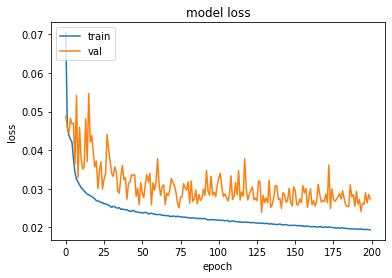

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [ ]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =4900
Best RMSENZ  =4654 (0.95)
Best MAENZ   =4637 (0.95)
Best Accuracy=4531 (0.92)
RMSE-NZ  Pred=0.0341  Noisy=0.1031
MAE-NZ   Pred=0.0273  Noisy=0.0937
PSNR     Pred=17.5 dB Noisy=8.8 dB
Accuracy Pred=0.35    Noisy=0.12
SSM      Pred=0.80    Noisy=0.43
HOG MSE  Pred=0.09    Noisy=0.08


In [ ]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_nitid_idx008.tif


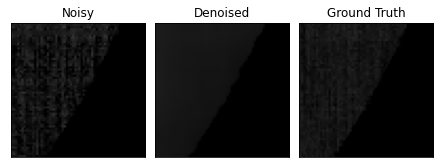

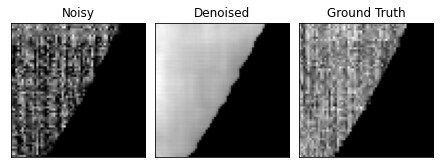

RMSE-NZ  Pred=0.0191  Noisy=0.0423 BEST
MAE-NZ   Pred=0.0111  Noisy=0.0298 BEST
PSNR     Pred=18.0 dB Noisy=11.1 dB BEST
Accuracy Pred=0.62    Noisy=0.36 BEST
SSM      Pred=0.82    Noisy=0.66
HOG MSE  Pred=0.07    Noisy=0.01
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_nitid_idx017.tif


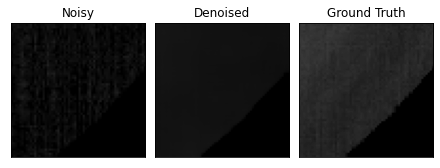

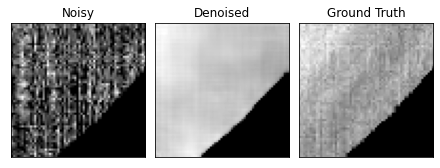

RMSE-NZ  Pred=0.0806  Noisy=0.1180 BEST
MAE-NZ   Pred=0.0696  Noisy=0.1096 BEST
PSNR     Pred=9.4 dB Noisy=6.1 dB BEST
Accuracy Pred=0.21    Noisy=0.07 BEST
SSM      Pred=0.68    Noisy=0.60
HOG MSE  Pred=0.03    Noisy=0.09
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_nitid_idx134.tif


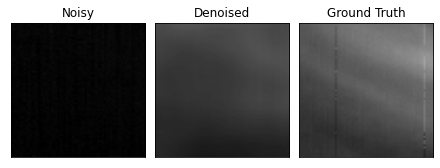

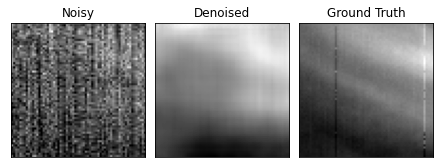

RMSE-NZ  Pred=0.1309  Noisy=0.3357 BEST
MAE-NZ   Pred=0.1202  Noisy=0.3214 BEST
PSNR     Pred=13.8 dB Noisy=5.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.77    Noisy=0.15
HOG MSE  Pred=0.13    Noisy=0.11
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_nitid_idx134.tif


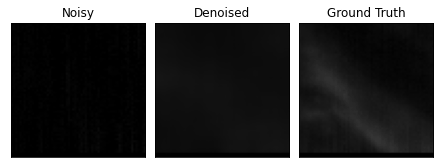

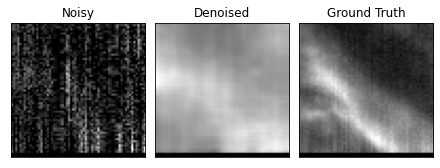

RMSE-NZ  Pred=0.0443  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0342  Noisy=0.0747 BEST
PSNR     Pred=13.5 dB Noisy=7.7 dB BEST
Accuracy Pred=0.15    Noisy=0.01 BEST
SSM      Pred=0.79    Noisy=0.26
HOG MSE  Pred=0.05    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_nitid_idx134.tif


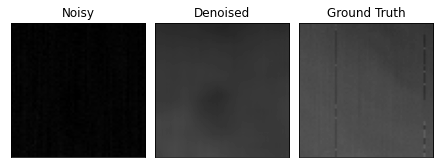

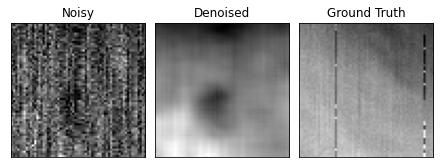

RMSE-NZ  Pred=0.0694  Noisy=0.2662 BEST
MAE-NZ   Pred=0.0660  Noisy=0.2643 BEST
PSNR     Pred=14.7 dB Noisy=3.1 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.85    Noisy=0.14
HOG MSE  Pred=0.09    Noisy=0.10
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_nitid_idx134.tif


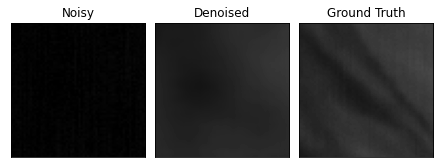

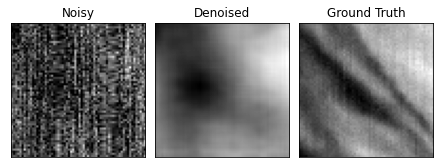

RMSE-NZ  Pred=0.0435  Noisy=0.1729 BEST
MAE-NZ   Pred=0.0379  Noisy=0.1686 BEST
PSNR     Pred=16.4 dB Noisy=4.4 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.85    Noisy=0.15
HOG MSE  Pred=0.11    Noisy=0.15
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_nitid_idx008.tif


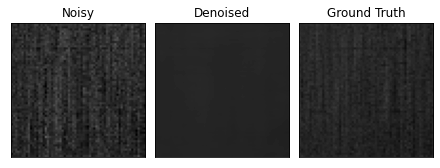

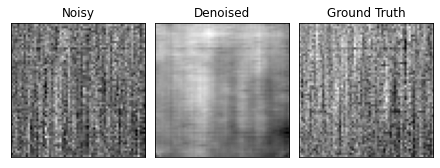

RMSE-NZ  Pred=0.0273  Noisy=0.0606 BEST
MAE-NZ   Pred=0.0217  Noisy=0.0478 BEST
PSNR     Pred=19.0 dB Noisy=12.0 dB BEST
Accuracy Pred=0.29    Noisy=0.15 BEST
SSM      Pred=0.61    Noisy=0.32
HOG MSE  Pred=0.05    Noisy=0.03
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_nitid_idx134.tif


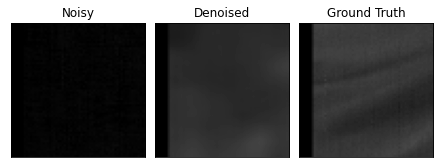

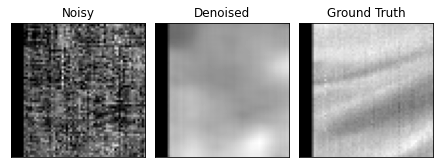

RMSE-NZ  Pred=0.0492  Noisy=0.1969 BEST
MAE-NZ   Pred=0.0364  Noisy=0.1941 BEST
PSNR     Pred=15.3 dB Noisy=3.2 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.15
HOG MSE  Pred=0.05    Noisy=0.24
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_nitid_idx008.tif


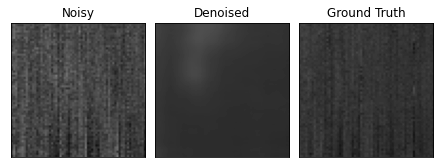

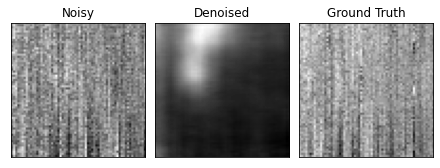

RMSE-NZ  Pred=0.0340  Noisy=0.0925 BEST
MAE-NZ   Pred=0.0262  Noisy=0.0774 BEST
PSNR     Pred=18.8 dB Noisy=10.1 dB BEST
Accuracy Pred=0.25    Noisy=0.06 BEST
SSM      Pred=0.62    Noisy=0.30
HOG MSE  Pred=0.07    Noisy=0.03
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_nitid_idx008.tif


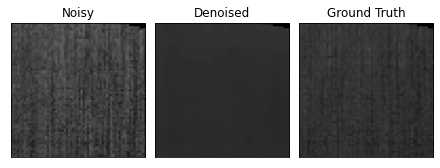

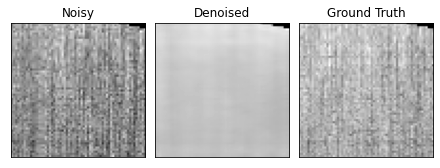

RMSE-NZ  Pred=0.0316  Noisy=0.0770 BEST
MAE-NZ   Pred=0.0264  Noisy=0.0644 BEST
PSNR     Pred=19.0 dB Noisy=11.2 dB BEST
Accuracy Pred=0.20    Noisy=0.08 BEST
SSM      Pred=0.69    Noisy=0.35
HOG MSE  Pred=0.10    Noisy=0.03
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_nitid_idx017.tif


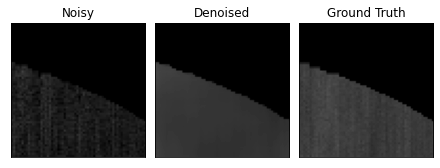

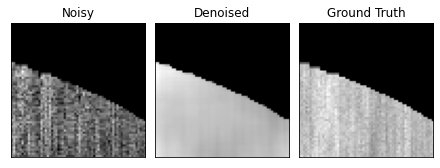

RMSE-NZ  Pred=0.0296  Noisy=0.1235 BEST
MAE-NZ   Pred=0.0180  Noisy=0.1063 BEST
PSNR     Pred=20.6 dB Noisy=8.2 dB BEST
Accuracy Pred=0.55    Noisy=0.19 BEST
SSM      Pred=0.87    Noisy=0.70
HOG MSE  Pred=0.08    Noisy=0.01
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_nitid_idx017.tif


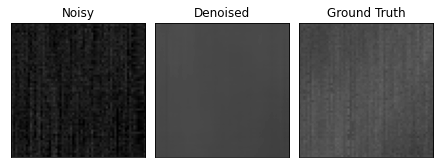

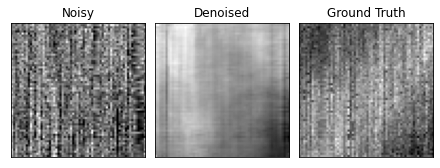

RMSE-NZ  Pred=0.0405  Noisy=0.2174 BEST
MAE-NZ   Pred=0.0343  Noisy=0.2121 BEST
PSNR     Pred=19.8 dB Noisy=5.2 dB BEST
Accuracy Pred=0.15    Noisy=0.00 BEST
SSM      Pred=0.70    Noisy=0.26
HOG MSE  Pred=0.18    Noisy=0.05
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_nitid_idx146.tif


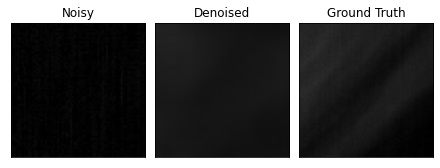

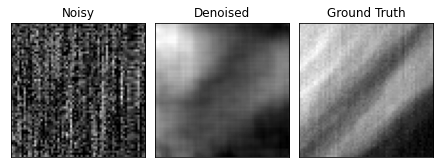

RMSE-NZ  Pred=0.0289  Noisy=0.0873 BEST
MAE-NZ   Pred=0.0242  Noisy=0.0780 BEST
PSNR     Pred=15.8 dB Noisy=6.2 dB BEST
Accuracy Pred=0.21    Noisy=0.06 BEST
SSM      Pred=0.84    Noisy=0.27
HOG MSE  Pred=0.08    Noisy=0.17
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_nitid_idx008.tif


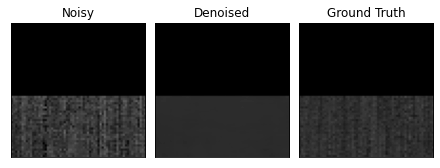

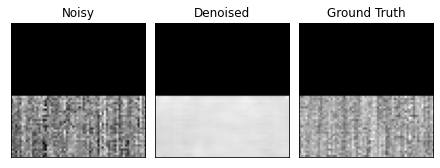

RMSE-NZ  Pred=0.0234  Noisy=0.0789 BEST
MAE-NZ   Pred=0.0128  Noisy=0.0631 BEST
PSNR     Pred=21.8 dB Noisy=11.2 dB BEST
Accuracy Pred=0.65    Noisy=0.09 BEST
SSM      Pred=0.79    Noisy=0.66
HOG MSE  Pred=0.20    Noisy=0.02
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_nitid_idx017.tif


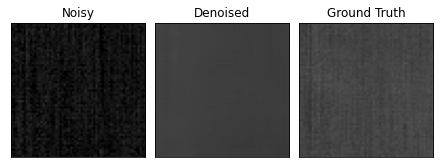

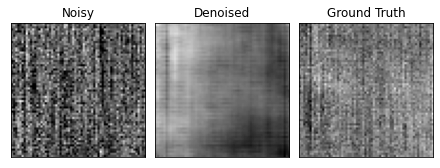

RMSE-NZ  Pred=0.0347  Noisy=0.2053 BEST
MAE-NZ   Pred=0.0292  Noisy=0.2012 BEST
PSNR     Pred=20.2 dB Noisy=4.7 dB BEST
Accuracy Pred=0.18    Noisy=0.00 BEST
SSM      Pred=0.74    Noisy=0.24
HOG MSE  Pred=0.09    Noisy=0.05
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )